In [ ]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=c800a059db91485bd31f60f84b471f5cd8bc6e7ccf79fc520006107f167c7e5e
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
import ta

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

NameError: name 'drive' is not defined

In [ ]:

data=pd.read_csv("/content/drive/MyDrive/stock_price/RELIANCE FINAL.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

<ipython-input-8-023b613fc7de>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data=pd.read_csv("/content/drive/MyDrive/stock_price/RELIANCE FINAL.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)


In [ ]:
print(data)

             Open Price   High Price    Low Price  Close Price    Adj Close  \
Date                                                                          
01-01-2003    42.957905    43.057873    42.429501    42.529469    34.164673   
02-01-2003    42.679420    42.679420    41.786842    41.915375    33.671356   
03-01-2003    42.143875    42.179577    41.001377    41.122768    33.034641   
06-01-2003    41.079926    41.194172    40.580082    40.672909    32.673267   
07-01-2003    40.851425    41.072784    40.601501    40.708611    32.701954   
...                 ...          ...          ...          ...          ...   
22-12-2023  2559.600098  2580.899902  2547.649902  2565.050049  2565.050049   
26-12-2023  2568.000000  2591.949951  2562.699951  2578.050049  2578.050049   
27-12-2023  2582.000000  2599.899902  2573.100098  2586.850098  2586.850098   
28-12-2023  2589.800049  2612.000000  2586.850098  2605.550049  2605.550049   
29-12-2023  2611.100098  2614.000000  2579.300049  2

In [ ]:


data['EMA_50'] = ta.trend.ema_indicator(data['Close Price'], window=50)
data['EMA_200'] = ta.trend.ema_indicator(data['Close Price'], window=200)
data['RSI'] = ta.momentum.rsi(data['Close Price'], window=14)
data['MACD'] = ta.trend.macd(data['Close Price'], window_slow=26, window_fast=12)
data['BB_upper'], data['BB_middle'], data['BB_lower'] = ta.volatility.bollinger_hband_indicator(data['Close Price']), ta.volatility.bollinger_mavg(data['Close Price']), ta.volatility.bollinger_lband_indicator(data['Close Price'])
data['%K'] = ta.momentum.stoch(high=data['High Price'],low=data['Low Price'], close=data['Close Price'], window=14)
data['%D'] = data['%K'].rolling(window=3).mean()
data['OBV'] = ta.volume.on_balance_volume(data['Close Price'], data['Close Price'].diff())

In [ ]:
print(data.isna().sum())
data = data.dropna()


Open Price        10
High Price        10
Low Price         10
Close Price       10
Adj Close         10
No. of Trades     10
EMA_50            49
EMA_200          200
RSI               13
MACD              25
BB_upper           0
BB_middle        219
BB_lower           0
%K               153
%D               175
OBV               21
dtype: int64


In [ ]:
data.head(5)


,Open Price,High Price,Low Price,Close Price,Adj Close,No. of Trades,EMA_50,EMA_200,RSI,MACD,BB_upper,BB_middle,BB_lower,%K,%D,OBV
Date,,,,,,,,,,,,,,,,
08-10-2003,66.407661,66.407661,64.072685,65.015244,53.930767,32240190.0,57.563268,48.772365,66.827491,2.131571,0.0,60.841916,0.0,53.601682,53.262704,125.274831
09-10-2003,65.550789,66.122040,64.565384,65.000961,53.918919,38078180.0,57.854942,48.933844,66.756810,2.153609,0.0,61.030785,0.0,51.135829,51.805160,125.289114
10-10-2003,65.436539,67.407349,65.436539,67.250259,55.784737,53664973.0,58.223386,49.116097,71.812851,2.325763,0.0,61.400312,0.0,65.167049,56.634853,127.538412
13-10-2003,67.243118,69.121094,66.479073,68.699799,56.987144,38941825.0,58.634226,49.310960,74.504057,2.549770,1.0,61.946568,0.0,70.383625,62.228834,128.987952
14-10-2003,69.263908,69.678062,66.429085,66.871803,55.470795,42510841.0,58.957268,49.485694,65.952299,2.550394,0.0,62.361438,0.0,55.585102,63.711925,130.815948


In [ ]:
data.tail(5)

,Open Price,High Price,Low Price,Close Price,Adj Close,No. of Trades,EMA_50,EMA_200,RSI,MACD,BB_upper,BB_middle,BB_lower,%K,%D,OBV
Date,,,,,,,,,,,,,,,,
22-12-2023,2559.600098,2580.899902,2547.649902,2565.050049,2565.050049,8270892.0,2418.888070,2370.063726,72.642170,49.083895,0.0,2460.177502,0.0,82.446097,77.303954,51545.684013
26-12-2023,2568.000000,2591.949951,2562.699951,2578.050049,2578.050049,3732832.0,2425.129716,2372.133242,73.987339,51.456029,0.0,2469.385010,0.0,89.197588,84.505440,51558.684013
27-12-2023,2582.000000,2599.899902,2573.100098,2586.850098,2586.850098,4602078.0,2431.471692,2374.269728,74.887483,53.430143,0.0,2479.007520,0.0,93.259394,88.301026,51567.484062
28-12-2023,2589.800049,2612.000000,2586.850098,2605.550049,2605.550049,6151318.0,2438.298294,2376.571025,76.730205,55.859657,0.0,2489.250025,0.0,96.864389,93.107124,51586.184013
29-12-2023,2611.100098,2614.000000,2579.300049,2584.949951,2584.949951,5432292.0,2444.049339,2378.644447,70.585532,55.483233,0.0,2499.625025,0.0,86.013454,92.045745,51606.784111


In [ ]:

# Normalize the data
scaler = MinMaxScaler()

In [ ]:
normalized_data = scaler.fit_transform(data[['Close Price','%K','%D','OBV','EMA_200' ,'EMA_50', 'RSI', 'MACD']])



In [ ]:

def prepare_data(data, lookback=30, forecast_horizon=10):
    X, y = [], []
    for i in range(len(data) - lookback - forecast_horizon):
        X.append(data[i:i + lookback])
        # Trend: 1 if price after 10 days is greater than price on the 30th day, else 0
        y.append(1 if data[i + lookback + forecast_horizon - 1, 0] > data[i + lookback - 1, 0] else 0)
    return np.array(X), np.array(y)


In [ ]:
lookback = 30
forecast_horizon = 5

In [ ]:
X, y = prepare_data(normalized_data, lookback, forecast_horizon)

# Split into training and testing datasets
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

In [ ]:
print(len(X[0]))

30


In [ ]:
ct1=0
ct2=0
for ele in y:
  if ele == 1:
    ct1=ct1+1
  else:
    ct2=ct2+1
print(ct1)
print(ct2)

2632
2171


In [ ]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(lookback, X.shape[2])),
    Dropout(0.4),
    BatchNormalization(),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<Sequential name=sequential, built=True>


In [ ]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test),
    class_weight=class_weights_dict,
    shuffle=False  # Ensures the temporal order of the data
)


Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.5508 - loss: 0.7545 - val_accuracy: 0.5088 - val_loss: 0.6929
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.5271 - loss: 0.7305 - val_accuracy: 0.4579 - val_loss: 0.7086
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.5393 - loss: 0.7189 - val_accuracy: 0.4620 - val_loss: 0.7008
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5547 - loss: 0.7025 - val_accuracy: 0.4485 - val_loss: 0.7025
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5346 - loss: 0.7029 - val_accuracy: 0.5265 - val_loss: 0.6981
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5557 - loss: 0.6909 - val_accuracy: 0.4558 - val_loss: 0.7118
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.5425 - loss: 0.7002 - val_accuracy: 0.5442 - val_loss: 0.7115
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.5559 - loss: 0.6888 - val_accuracy: 0

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predict the trend on test data
predictions = (model.predict(X_test) > 0.5).astype(int)

# Analyze class distribution in predictions
unique, counts = np.unique(predictions, return_counts=True)
print(f"Prediction distribution: {dict(zip(unique, counts))}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4279 - loss: 1.8425
Test Accuracy: 45.16%
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Prediction distribution: {0: 783, 1: 178}


In [ ]:
print(predictions)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


In [ ]:
ct1=0
ct2=0
for ele in predictions:
  if ele == 1:
    ct1=ct1+1
  else:
    ct2=ct2+1
print("No. of upside:", ct1)
print("No. of downside: ", ct2)

No. of upside: 178
No. of downside:  783


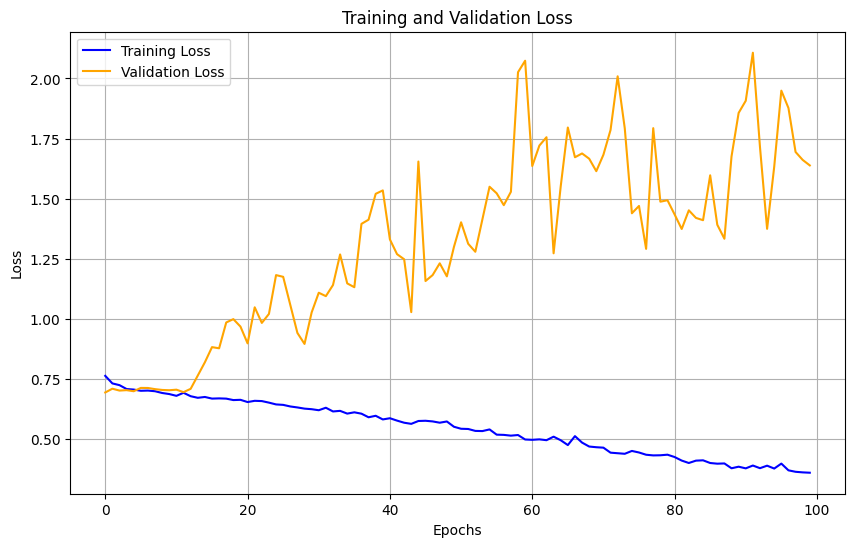

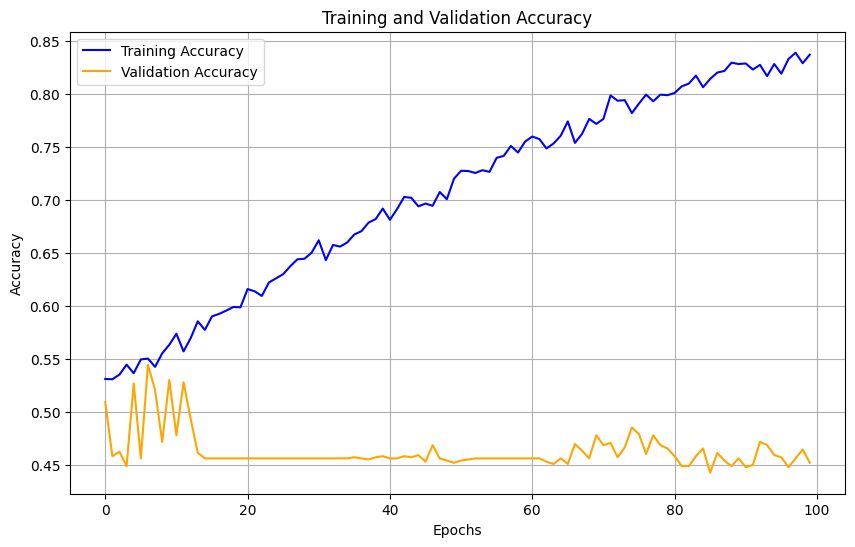

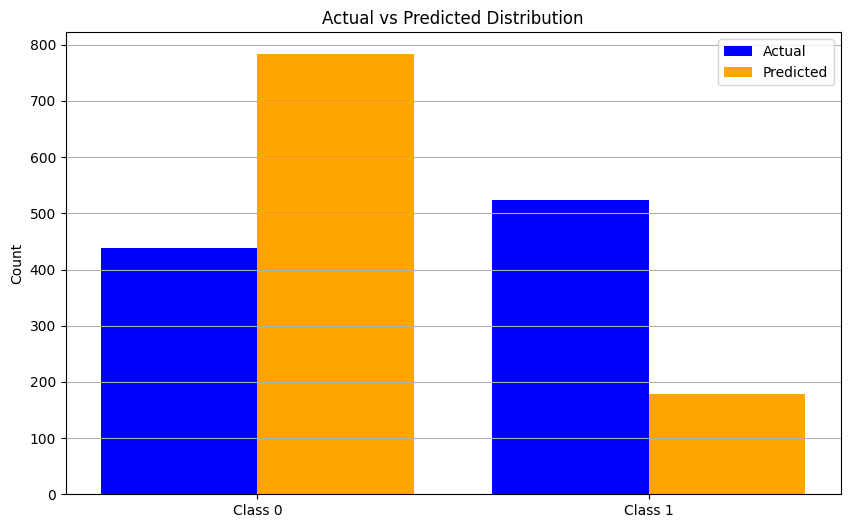

In [ ]:
import matplotlib.pyplot as plt

# 1. Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 3. Plot Predicted vs Actual Distribution
unique, counts = np.unique(predictions, return_counts=True)
predicted_distribution = dict(zip(unique, counts))

actual_unique, actual_counts = np.unique(y_test, return_counts=True)
actual_distribution = dict(zip(actual_unique, actual_counts))

# Bar chart for actual vs predicted
labels = ['Class 0', 'Class 1']
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, [actual_distribution.get(0, 0), actual_distribution.get(1, 0)],
        width=0.4, label='Actual', color='blue')
plt.bar(x + 0.2, [predicted_distribution.get(0, 0), predicted_distribution.get(1, 0)],
        width=0.4, label='Predicted', color='orange')
plt.xticks(x, labels)
plt.ylabel('Count')
plt.title('Actual vs Predicted Distribution')
plt.legend()
plt.grid(True, axis='y')
plt.show()
